### 1. Introduction:
Facebook Followers:

Social media platforms like Facebook provide a myriad of points for companies about their customer traction,foot traffic and brand awareness among others. Companies can obtain this useful information through analysis of the feedback data from their Facebook followers. This information can be further used to understand and predict their stock performance and popularity. 

By doing an exploratoty data analysis, I have explored following topics related to these companies: 
    a. Compare companies with highest volatility of “talking about count” — who they are – and use any information online to see if this metric overlaps with highly publicized events and marketing campaigns.\
    b. Facebook check-ins as a metric for foot traffic for restaurant, hospitality and retail businesses. Who are the winners in attracting customers to physical locations.\
    c.Facebook followers and which companies are the most successful at growing social media traction
 
I was also curious about how the foot traffic changes over time for the companies that have the most foot traffic. So I took Disneyland as an example, built time series forecasting, and try to check the performance of Autoregressive Integrated moving average(ARIMA) model on this issue. 

For the next steps, I’m planning to get the closing price for the S&P 500 across those same years and the stock price of a specific company like Disneyland and see if there is any correlation between the fluctuation of stock market and the changes in the popularity of those companies.

### 2. Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import datetime
from sklearn.linear_model import LinearRegression

df = pd.read_csv('temp_datalab_records_social_facebook.csv')
df.head()

C:\Users\zp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [2]:
df.shape

(3621391, 14)

In [2]:
df.time.max()

'2018-07-17 04:00:00+00'

In [3]:
df.time.min()

'2015-01-01 05:00:00+00'

In [5]:
print('This dataset has ~3.6 million data points from 01-01-2015 to 07-17-2018')

This dataset has ~3.6 million data points from 01-01-2015 to 07-17-2018


### 3 Data preprocessing


#### a. Check and fill missing values in username

In [6]:
df.username.nunique()

4950

In [9]:
df.facebook_id.nunique()

4714

In [30]:
df_new = df[df.username.notnull()]
df_new.facebook_id.nunique()

4582

In [36]:
df_new.username.nunique()

4950

In [31]:
## make a dictionary with two columns from the dataframe

dict_name_id = pd.Series(df_new.username.values,index=df_new.facebook_id).to_dict()

In [33]:
len(dict_name_id)

4582

In [37]:
# create a new username column by mapping the values from the disctionary that is just created, where the keys of the dictionary is kept as same as the facebook_id column of that dataframe
df['username_re'] = df['facebook_id'].map(dict_name_id)
df.username_re.nunique()

4582

In [42]:
# fill the na in username according to the dictionary just created
df.username_new = df.username.fillna(df.facebook_id.map(dict_name_id))
df.username_new.isnull().sum()

79942

In [38]:
df.username_re.isnull().sum()

79942

In [44]:
df_remove_na = df.loc[df.username_re.notnull()]

In [116]:
df_remove_na.shape

(3541449, 14)

In [48]:
print('Dataframe df_remove_na and column username_re will be used in the following analysis')

df_remove_na and username_re will be used in the following analysis


#### b.check missing values in df_remove_na
 entity_id cusip isin are columns of nulls and these can be removed.

In [50]:
print(df_remove_na.isnull().sum())

dataset_id                   0
time                         0
username                 40987
checkins                     0
has_added_app                0
were_here_count              0
likes                        0
talking_about_count          0
facebook_id                  0
date_added             1498470
date_updated              1364
entity_id              3541449
cusip                  3541449
isin                   3541449
username_new                 0
username_re                  0
dtype: int64


In [51]:
df_remove_na = df_remove_na.drop(['entity_id', 'cusip','isin'], axis=1)
print('remove null columns: entity_id, cusip and isin')

remove null columns: entity_id, cusip and isin


#### c. check the correlation

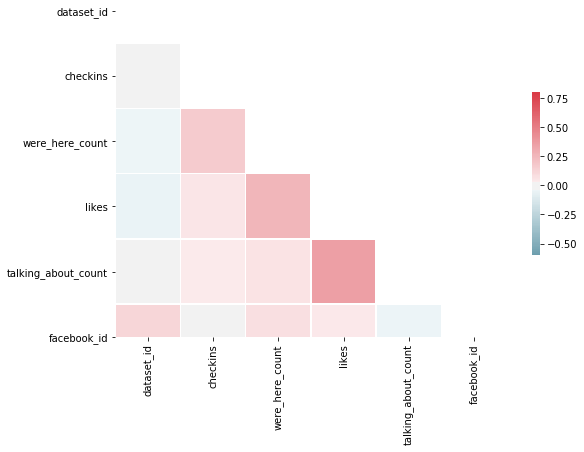

In [52]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# check the correlation
cor = df_remove_na.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.8, vmin = -.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In general, features such as likes, were_here_count and checkins are potively correlated to talking_about_count. 

the higher the value is, the higher probability of the label to be 1.

###  4. Exploratory Data Analysis


a. Compare companies with highest volatility of “talking about count” — who they are – and use any information online to see if this metric overlaps with highly publicized events and marketing campaigns.

In [56]:
df_a = df_remove_na.groupby('username_re').talking_about_count.mean().reset_index().sort_values(['talking_about_count'], ascending=0).reset_index()
df_a.username_re[:10]

0    manchesterunited
1                 wwe
2             nytimes
3             CBSNews
4            usatoday
5        CollegeHumor
6                ESPN
7            Storyful
8               yahoo
9              NYPost
Name: username_re, dtype: object

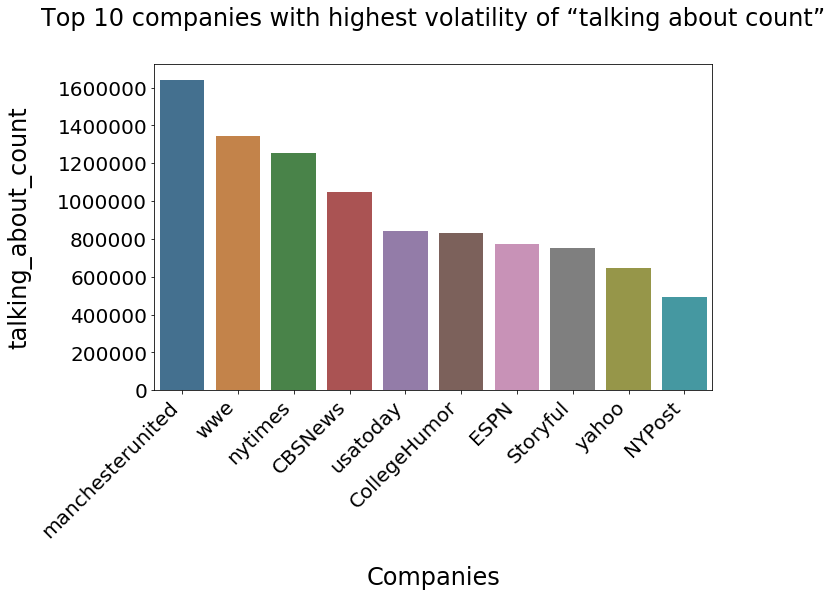

In [115]:
fig, ax = plt.subplots(figsize = ( 10, 6 ))
#fig = plt.figure(figsize=(17, 10))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

sns.barplot(x = 'username_re', y = 'talking_about_count', saturation = 0.5, data = df_a.head(10))
plt.title('Top 10 companies with highest volatility of “talking about count”', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Companies', fontsize = 24)
plt.ylabel('talking_about_count', fontsize= 24)
plt.ticklabel_format(style='scientific', axis='y')

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25
#ax.ticklabel_format(axis='y', style='scientific')


plt.show()

The top 5 companies with highest volatility are footfoot club, media comapnies and online social media agency, for example, Manchesterunited football club, World Wrestling Entertainment(wwe), NYtimes, CBSNews, USAtoday

b. Facebook check-ins as a metric for foot traffic for restaurant, hospitality and retail businesses. Who are the winners in attracting customers to physical locations.

In [58]:
df_b = df_remove_na.groupby('username_re').checkins.mean().reset_index().sort_values(['checkins'], ascending=0).reset_index()
df_b.username_re[:10]

0              Disneyland
1         WaltDisneyWorld
2       DisneylandParisfr
3               TheGarden
4     empirestatebuilding
5         KnottsBerryFarm
6                SeaWorld
7    BuschGardensTampaBay
8              cedarpoint
9           disneyland.hk
Name: username_re, dtype: object

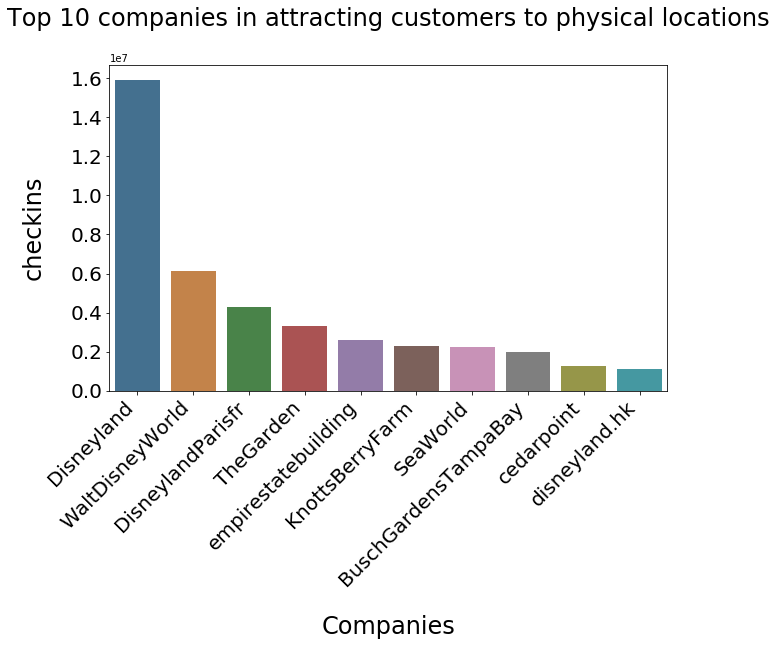

In [99]:
fig, ax = plt.subplots(figsize = ( 10, 6 ))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

sns.barplot(x = 'username_re', y = 'checkins', saturation = 0.5, data = df_b.head(10))
plt.title('Top 10 companies in attracting customers to physical locations', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Companies', fontsize = 24)
plt.ylabel('checkins', fontsize= 24)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

plt.show()

The 5 companies with great foottraffic are theme parks and tourist attractions and fast food  Disneyland,  Empire State Building, Knotts Berry Farm, Sea World, Cedarpoint etc. 

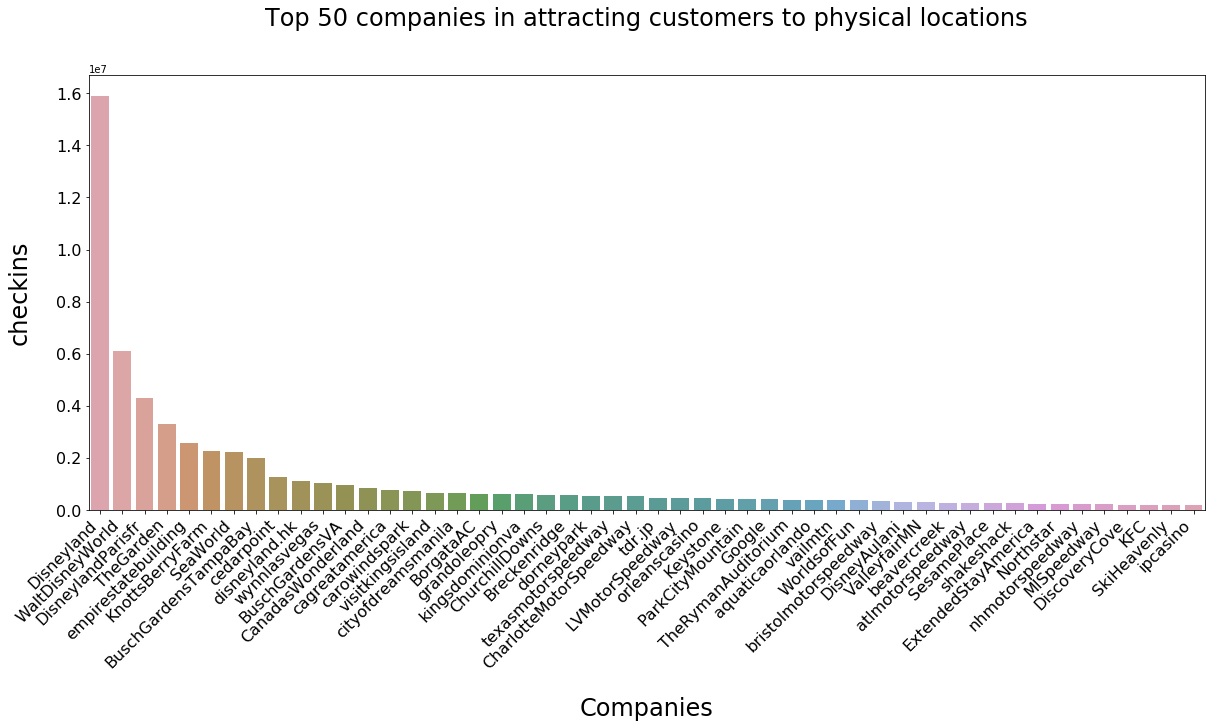

In [119]:
fig, ax = plt.subplots(figsize = ( 20, 8 ))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

sns.barplot(x = 'username_re', y = 'checkins', saturation = 0.5, data = df_b.head(50))
plt.title('Top 50 companies in attracting customers to physical locations', fontsize = 24)
plt.xticks(rotation=45, fontsize = 16, ha='right')
plt.yticks(fontsize = 16)
plt.xlabel('Companies', fontsize = 24)
plt.ylabel('checkins', fontsize= 24)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

plt.show()

c. Facebook followers and which companies are the most successful at growing social media traction

In [60]:
df_c = df_remove_na.groupby('username_re').likes.mean().reset_index().sort_values(['likes'], ascending=0).reset_index()
df_c.username_re[:10]

0            facebook
1             youtube
2    manchesterunited
3         McDonaldsUS
4           McDonalds
5          natgeotvUS
6              Disney
7                 KFC
8             PepsiUS
9           Starbucks
Name: username_re, dtype: object

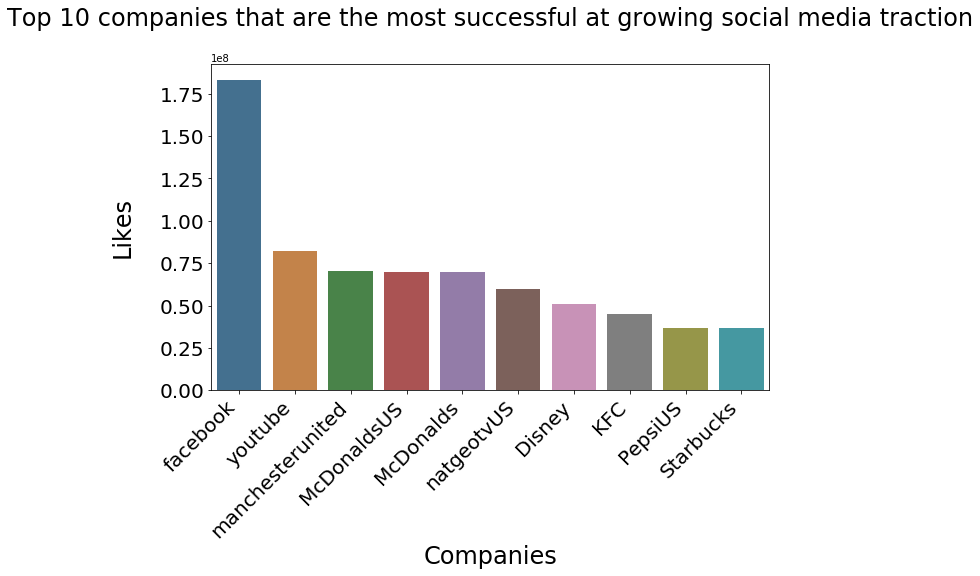

In [94]:
fig, ax = plt.subplots(figsize = ( 10, 6 ))
#fig = plt.figure(figsize=(17, 10))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

sns.barplot(x = 'username_re', y = 'likes', saturation = 0.5, data = df_c.head(10))
plt.title('Top 10 companies that are the most successful at growing social media traction', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Companies', fontsize = 24)
plt.ylabel('Likes', fontsize= 24)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25

plt.show()

d. were_here_count, Could it also be used as a metric for foot traffic?

In [62]:
df_d = df_remove_na.groupby('username_re').were_here_count.mean().reset_index().sort_values(['were_here_count'], ascending=0).reset_index()
df_d.username_re[:10]

0      Starbucks
1    amctheatres
2    McDonaldsUS
3      McDonalds
4    OliveGarden
5      applebees
6         Chilis
7       cinemark
8         hilton
9     Disneyland
Name: username_re, dtype: object

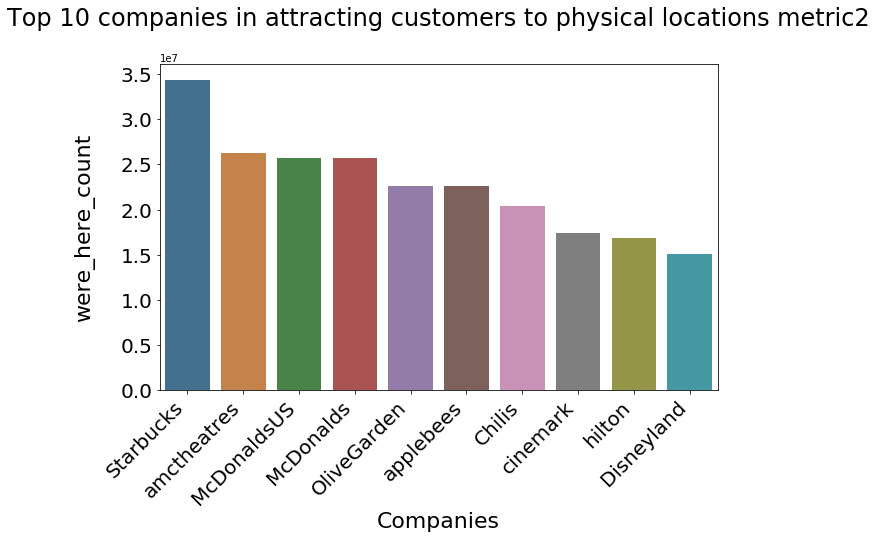

In [90]:
fig, ax = plt.subplots(figsize = ( 10, 6 ))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

sns.barplot(x = 'username_re', y = 'were_here_count', saturation = 0.5, data = df_d.head(10))
plt.title('Top 10 companies in attracting customers to physical locations metric2', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Companies', fontsize = 22)
plt.ylabel('were_here_count', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25

#for ax in g.axes:
#    ax.title.set_position([.5, 1.1])
#    ax.yaxis.labelpad = 25

plt.show()

In [83]:
df_remove_na.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,username_new,username_re
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,SodaStream,SodaStream
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,ANSYSInc,ANSYSInc
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,MyAquaAmerica,MyAquaAmerica
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,Qualcomm,Qualcomm
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,eaglepharmaceuticals,eaglepharmaceuticals


### 5.  Time Series Forescasting

In [84]:
# convert string 'time' into datetime format, if there is any 
df_remove_na['time']= pd.to_datetime(df['time']) 
# extract the date info from the time column, and store it into additional column called 'date'; and ignore the hours
df_remove_na['date'] = [d.date() for d in df_remove_na['time']]

In [137]:
#Take out data points only for Disneyland to make time series
disneyland_ts = df_remove_na[df_remove_na.username_re == 'Disneyland'][['date','checkins']]


In [139]:
# A time series implies that the index is a DatetimeIndex, this step is to set the 'date' to index and a variable depicting date-time information
disneyland_ts.index = pd.to_datetime(disneyland_ts['date'])
#df = df.set_index('datetime')
disneyland_ts.drop(['date'], axis=1, inplace=True)
disneyland_ts.head()

,checkins
date,
2017-01-19,14161182
2017-01-20,14164353
2017-01-21,14169166
2017-01-22,14178516
2017-01-23,14185067


In [145]:
diff_ts=disneyland_ts.diff()
diff_ts.head()

,checkins
date,
2017-01-19,NaN
2017-01-20,3171.0
2017-01-21,4813.0
2017-01-22,9350.0
2017-01-23,6551.0


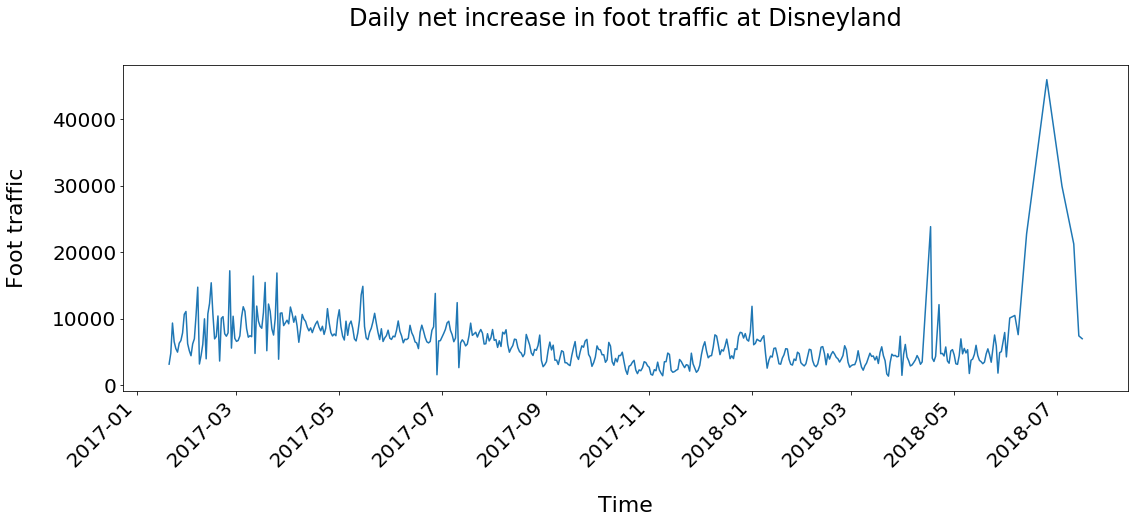

In [149]:
# Plot the time series just created
fig, ax = plt.subplots(figsize = ( 18, 6 ))

plt.plot(diff_ts)

plt.title('Daily net increase in foot traffic at Disneyland', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

#### Check Stationary 

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.
Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

        constant mean
        constant variance
        an autocovariance that does not depend on time.
I’ll skip the details as it is very clearly defined in this article. Lets move onto the ways of testing stationarity. First and foremost is to simple plot the data and analyze visually. The data can be plotted using following command:

In [199]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(10).mean()
    rolstd = timeseries.rolling(10).std()

    #Plot rolling statistics:
    
    fig, ax = plt.subplots(figsize = ( 18, 6 ))

    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best', fontsize = 20 )
    plt.title('Rolling Mean & Standard Deviation', fontsize = 24)
    
    plt.xticks(rotation=45, fontsize = 20, ha='right')
    plt.yticks(fontsize = 20)
    plt.xlabel('Time', fontsize = 22)
    plt.ylabel('Foot traffic', fontsize= 22)
    
    ax.title.set_position([.5, 1.1])
    ax.yaxis.labelpad = 25
    ax.xaxis.labelpad = 25
    
    plt.show(block=False)
    
#    #Perform Dickey-Fuller test:
#    print('Results of Dickey-Fuller Test:')
#    dftest = adfuller(timeseries, autolag='AIC')
#    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#    for key,value in dftest[4].items():
#        dfoutput['Critical Value (%s)'%key] = value
#    print(dfoutput)

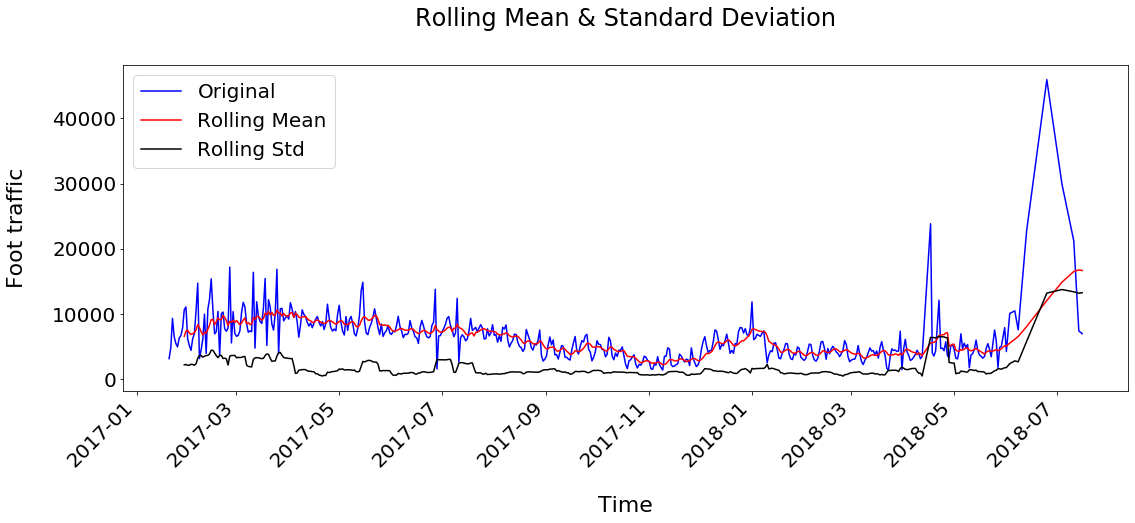

In [166]:
test_stationarity(diff_ts)

#### Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:


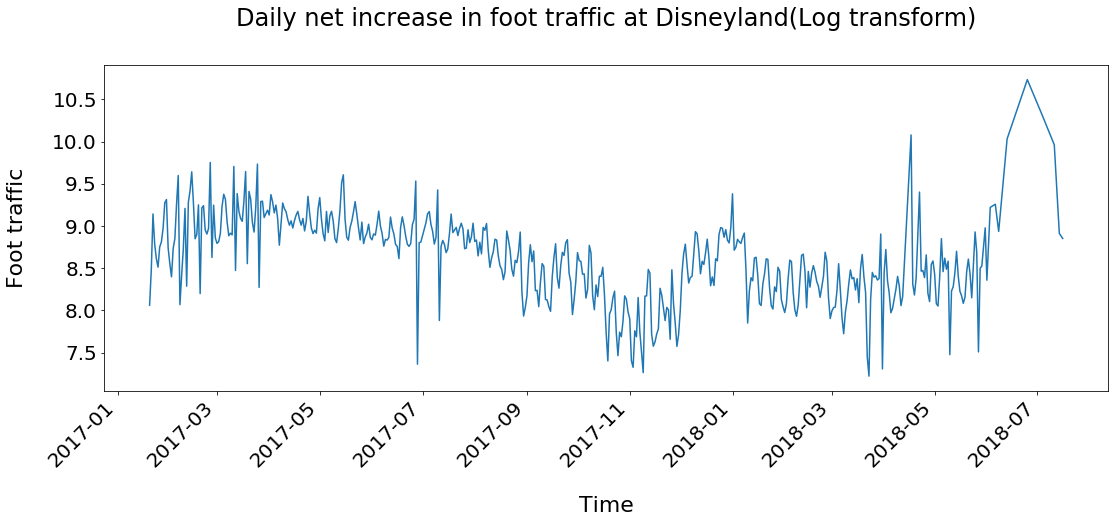

In [152]:
ts_log = np.log(diff_ts)

fig, ax = plt.subplots(figsize = ( 18, 6 ))

plt.plot(ts_log)

plt.title('Daily net increase in foot traffic at Disneyland(Log transform)', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

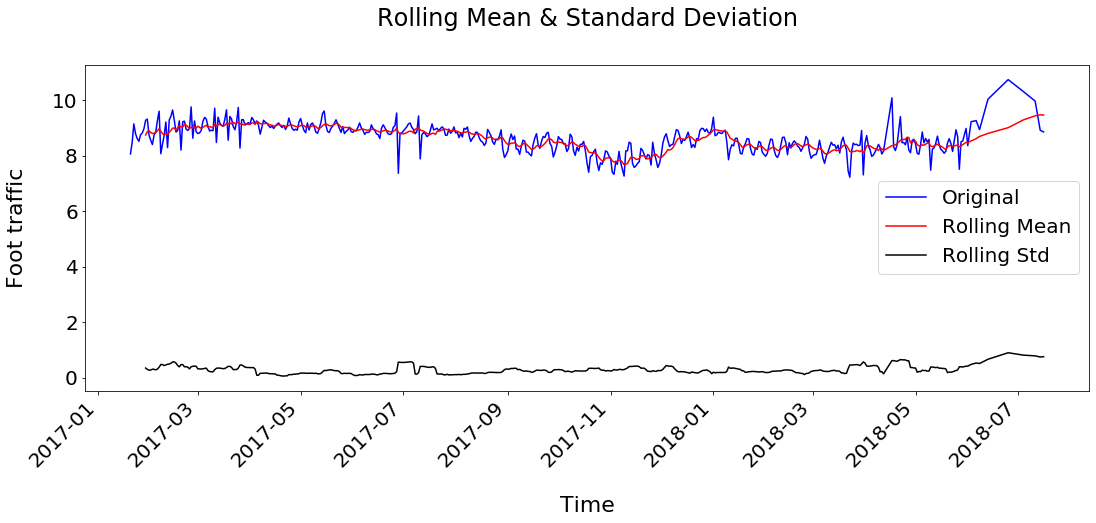

In [168]:
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

#### Eliminating Trend and Seasonality
The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

    Differencing – taking the differece with a particular time lag
    Decomposition – modeling both trend and seasonality and removing them from the model.
#### Here we use decomposing:
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 52)

Trend = decomposition.trend
Seasonal = decomposition.seasonal
Residual = decomposition.resid

fig, ax = plt.subplots(figsize = ( 18, 18 ))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
    
plt.subplot(4,1,1)
plt.plot(ts_log, label= 'Original')
plt.legend(loc='best', fontsize = 20)

plt.title('Original', fontsize = 24)
#plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
#plt.xlabel('Time', fontsize = 22)
plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
#ax.xaxis.labelpad = 25

plt.subplot(4,1,2)
plt.plot(Trend, label= 'Trend')
plt.legend(loc='best', fontsize = 20)

plt.title('Trend', fontsize = 24)
#plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
#plt.xlabel('Time', fontsize = 22)
plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
#ax.xaxis.labelpad = 25

plt.subplot(4,1,3)
plt.plot(Seasonal, label= 'Seasonal')
plt.legend(loc='best', fontsize = 20)

plt.title('Seasonal', fontsize = 24)
#plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
#plt.xlabel('Time', fontsize = 22)

plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
#ax.xaxis.labelpad = 25

plt.subplot(4,1,4)
plt.plot(Residual, label= 'Residual')
plt.legend(loc='best', fontsize = 20)

plt.title('Residual', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

#plt.tight_layout()
fig.suptitle('Decomposing', fontsize= 25)


plt.show()

NameError: name 'ts_log' is not defined

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

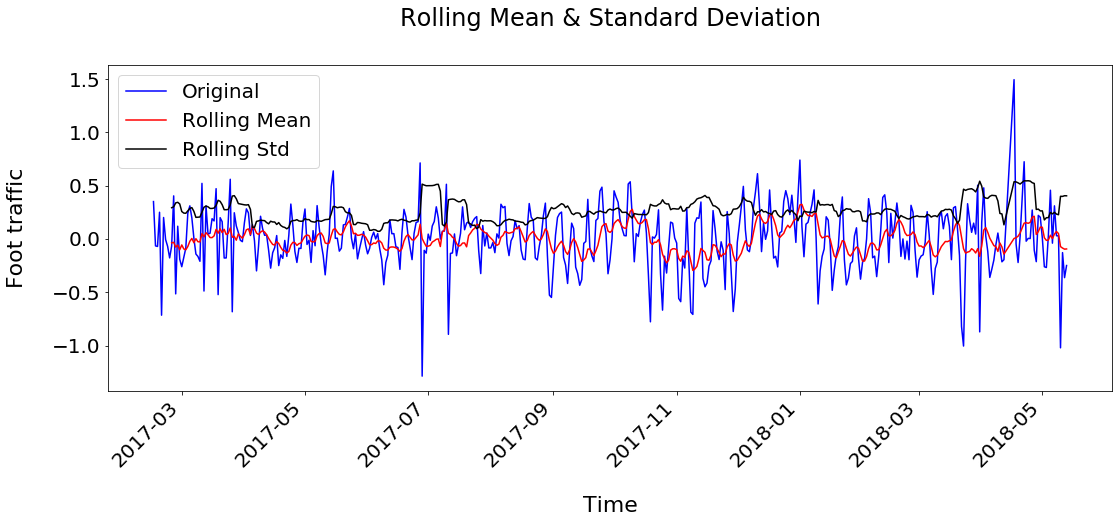

In [193]:
ts_log_decompose = Residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

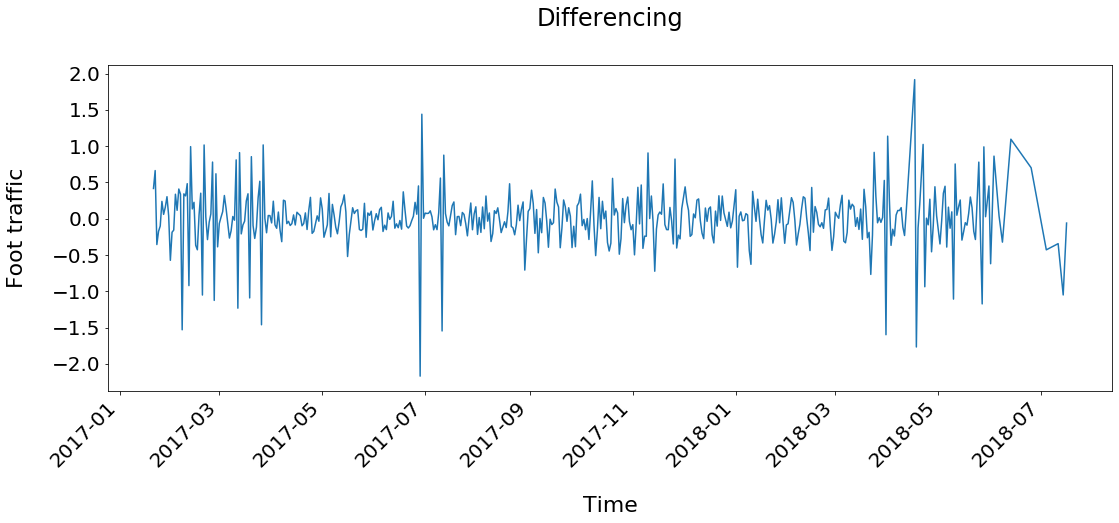

In [239]:
ts_log_diff = ts_log - ts_log.shift()

fig, ax = plt.subplots(figsize = ( 18, 6 ))

plt.plot(ts_log_diff)

plt.title('Differencing', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Foot traffic', fontsize= 22)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25


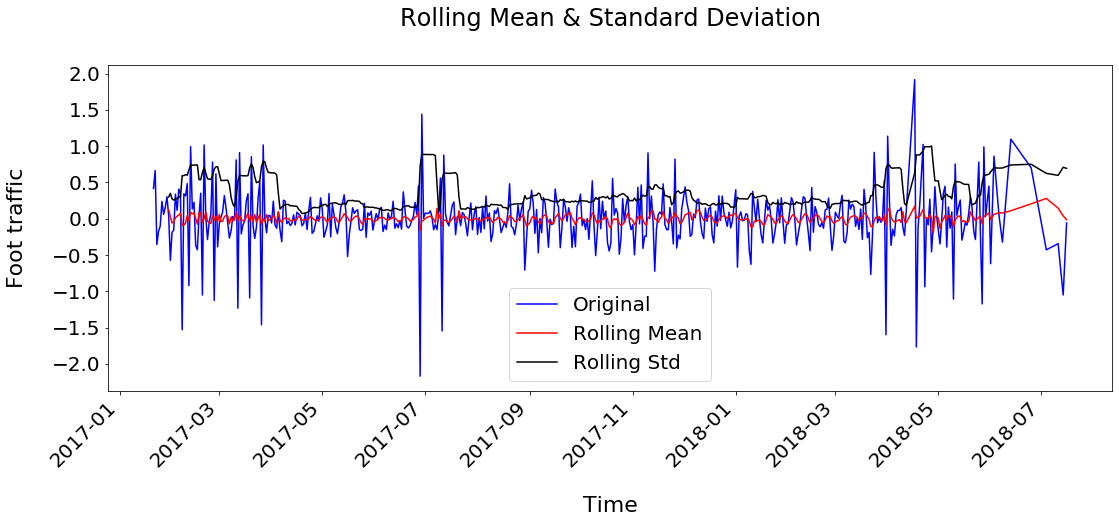

In [200]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time. 

### Forecasting a Time Series
We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

1. A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
2. A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

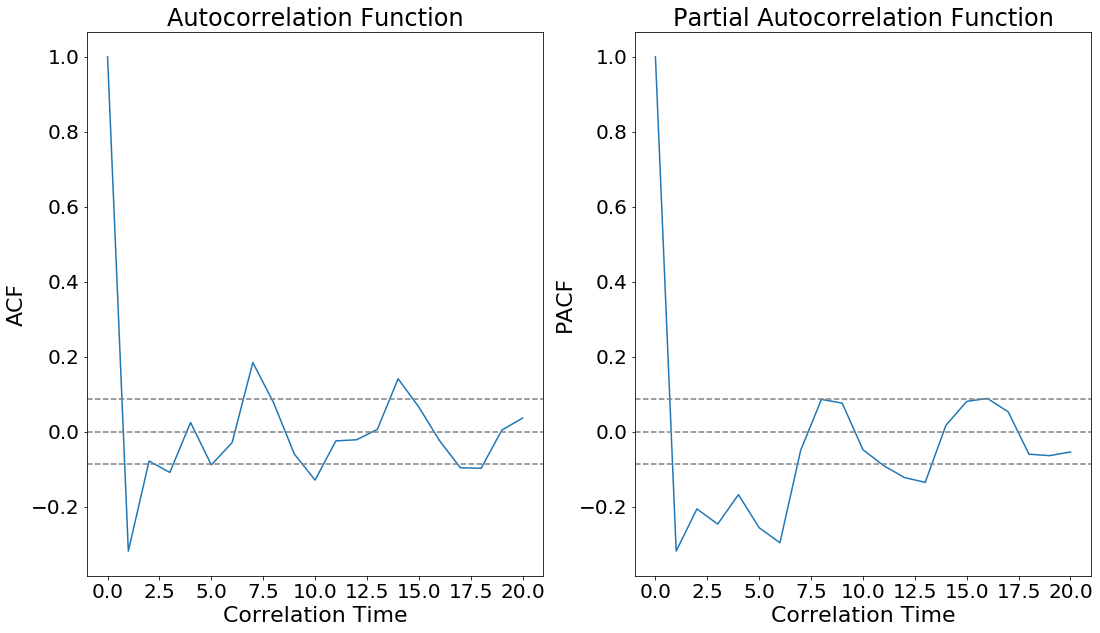

In [211]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
fig, ax = plt.subplots(figsize = ( 18, 10 ))

plt.subplot(121)
plt.plot(lag_acf)

plt.title('Autocorrelation Function', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Correlation Time', fontsize = 22)
plt.ylabel('ACF', fontsize= 22)

ax.title.set_position([.5, 1.05])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)

plt.title('Partial Autocorrelation Function', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Correlation Time', fontsize = 22)
plt.ylabel('PACF', fontsize= 22)

ax.title.set_position([.5, 1.05])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.show()


In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

    p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
    q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

### AR Model

In [257]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1) 




#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\zp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\zp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [248]:
df_RSS = ts_log_diff[['checkins']]
df_RSS['fittedvalues']=results_AR.fittedvalues
df_RSS['delta']= df_RSS.checkins-df_RSS.fittedvalues
RSS_AR = df_RSS.delta.pow(2).sum()
print('RSS: ', RSS_AR)

RSS:  67.3557329268633


In [243]:
ts_log_diff.head()

,checkins
date,
2017-01-20,NaN
2017-01-21,0.417274
2017-01-22,0.664056
2017-01-23,-0.355759
2017-01-24,-0.173779


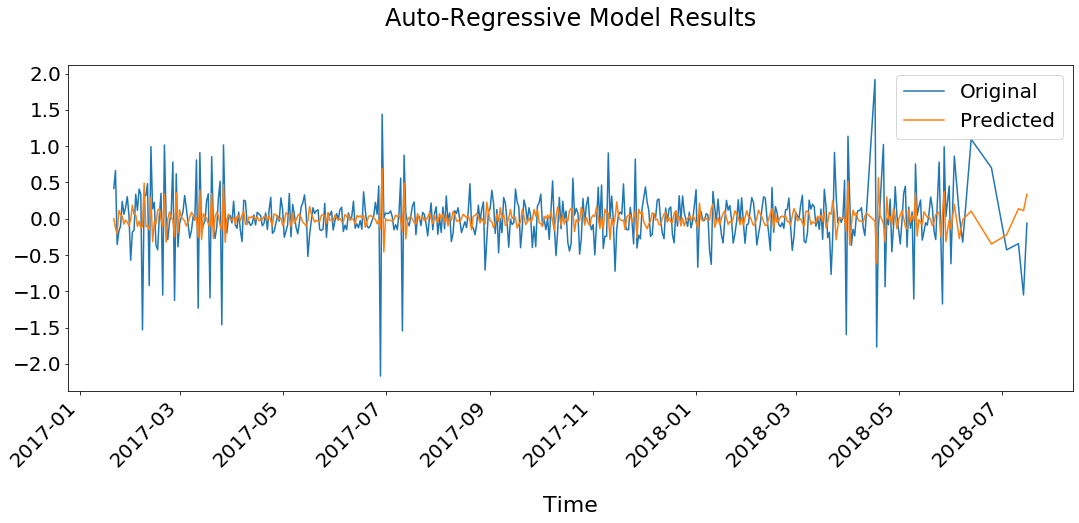

In [249]:
fig, ax = plt.subplots(figsize = ( 18, 6 ))

plt.plot(ts_log_diff, label= 'Original')
plt.plot(results_AR.fittedvalues, label= 'Predicted')

plt.title('Auto-Regressive Model Results', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
#plt.ylabel('Foot traffic', fontsize= 22)
plt.legend(loc='best', fontsize = 20)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

In [ ]:
### MA Model

In [250]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  

C:\Users\zp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\zp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [255]:
MA_RSS = ts_log_diff[['checkins']]
MA_RSS['fittedvalues']=results_MA.fittedvalues
MA_RSS['delta']= MA_RSS.checkins-MA_RSS.fittedvalues
RSS_MA = MA_RSS.delta.pow(2).sum()
print('RSS: ', RSS_MA)

RSS:  58.116809304651426


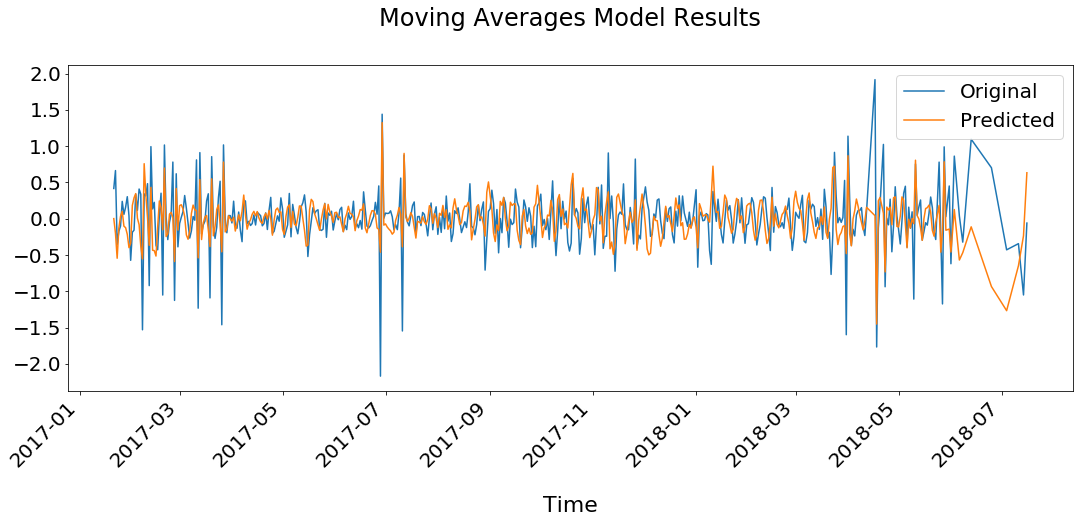

In [252]:
fig, ax = plt.subplots(figsize = ( 18, 6 ))

plt.plot(ts_log_diff, label= 'Original')
plt.plot(results_MA.fittedvalues, label= 'Predicted')

plt.title('Moving Averages Model Results', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
#plt.ylabel('Foot traffic', fontsize= 22)
plt.legend(loc='best', fontsize = 20)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

In [ ]:
### ARIMA Model(Combined Model)

In [253]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  

C:\Users\zp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\zp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [254]:
ARIMA_RSS = ts_log_diff[['checkins']]
ARIMA_RSS['fittedvalues']=results_ARIMA.fittedvalues
ARIMA_RSS['delta']= ARIMA_RSS.checkins-ARIMA_RSS.fittedvalues
RSS_ARIMA = MA_RSS.delta.pow(2).sum()
print('RSS: ', RSS_ARIMA)

RSS:  58.116809304651426


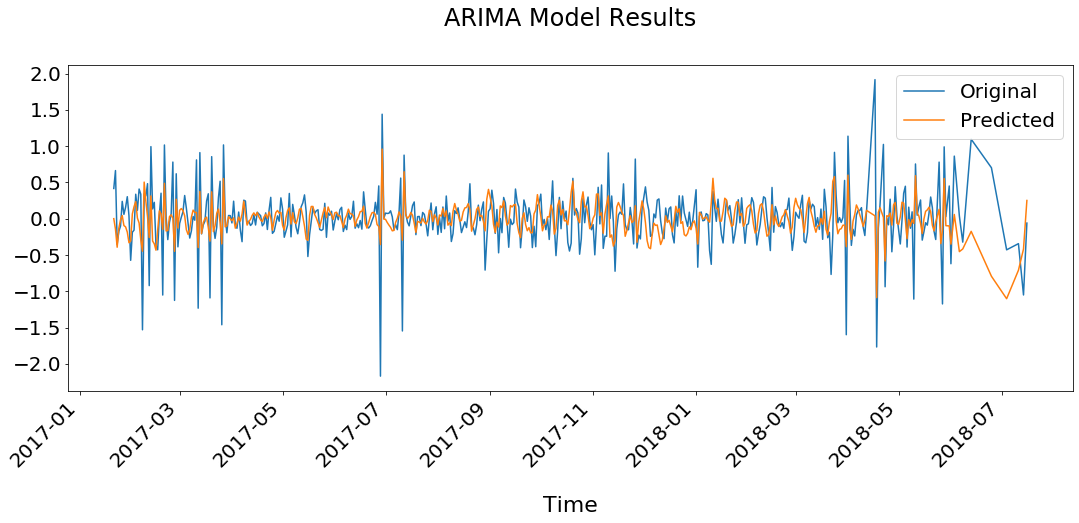

In [258]:
fig, ax = plt.subplots(figsize = ( 18, 6 ))

plt.plot(ts_log_diff, label= 'Original')
plt.plot(results_ARIMA.fittedvalues, label= 'Predicted')

plt.title('ARIMA Model Results', fontsize = 24)
plt.xticks(rotation=45, fontsize = 20, ha='right')
plt.yticks(fontsize = 20)
plt.xlabel('Time', fontsize = 22)
#plt.ylabel('Foot traffic', fontsize= 22)
plt.legend(loc='best', fontsize = 20)

ax.title.set_position([.5, 1.1])
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25

### Taking it back to original scale
MA and combined model gave better results than the AR model, let's scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.


In [260]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2017-01-21    0.001087
2017-01-22   -0.143879
2017-01-23   -0.392746
2017-01-24   -0.129770
2017-01-25   -0.013760
dtype: float64


To convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [261]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2017-01-21    0.001087
2017-01-22   -0.142792
2017-01-23   -0.535538
2017-01-24   -0.665308
2017-01-25   -0.679068
dtype: float64
